<a href="https://colab.research.google.com/github/crogers-cardiffmet/Data-Analysis/blob/main/PRAC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Task 1: Merging CSV Files**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd '/content/drive/MyDrive/Air_Data'

/content/drive/MyDrive/Air_Data


In [5]:
%ls

combined_output.csv
PRSA_Data_Changping_20130301-20170228.csv
PRSA_Data_Dongsi_20130301-20170228.csv
PRSA_Data_Huairou_20130301-20170228.csv
PRSA_Data_Nongzhanguan_20130301-20170228.csv


In [6]:
import pandas as pd
import glob

folder_path = "/content/drive/MyDrive/Air_Data/*.csv"

csv_files = glob.glob(folder_path)

combined_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

combined_df.to_csv("/content/drive/MyDrive/Air_Data/combined_output.csv", index=False)

print("Merged files into 'combined_output.csv'.")


Merged files into 'combined_output.csv'.


### **Task 2.1: Data Understanding**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#import pandas as pd

df = pd.read_csv("combined_output.csv")
df_original = df.copy()
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [ ]:
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset contains 420768 rows and 18 columns.


In [ ]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    411453 non-null  float64
 6   PM10     413712 non-null  float64
 7   SO2      412617 non-null  float64
 8   NO2      406971 non-null  float64
 9   CO       398730 non-null  float64
 10  O3       411993 non-null  float64
 11  TEMP     420336 non-null  float64
 12  PRES     420339 non-null  float64
 13  DEWP     420330 non-null  float64
 14  RAIN     420330 non-null  float64
 15  wd       418974 non-null  object 
 16  WSPM     420408 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [ ]:
print(df['station'].nunique())  # Number of different stations
print(df['wd'].nunique())  # Number of different wind directions

4
16


In [ ]:
print(df.describe())

                  No           year          month            day  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean    17532.500000    2014.662560       6.522930      15.729637   
std     10122.116943       1.177198       3.448707       8.800102   
min         1.000000    2013.000000       1.000000       1.000000   
25%      8766.750000    2014.000000       4.000000       8.000000   
50%     17532.500000    2015.000000       7.000000      16.000000   
75%     26298.250000    2016.000000      10.000000      23.000000   
max     35064.000000    2017.000000      12.000000      31.000000   

                hour          PM2.5           PM10            SO2  \
count  420768.000000  411453.000000  413712.000000  412617.000000   
mean       11.500000      77.959361     101.390813      16.088154   
std         6.922195      79.807846      90.731727      22.037820   
min         0.000000       2.000000       2.000000       0.285600   
25%         5.750000      19.0000

In [ ]:
df.describe(include=['object'])

,wd,station
count,418974,420768
unique,16,4
top,NW,Nongzhanguan
freq,41139,105192


In [ ]:
def missing_values_table(df):
        mis_val = df.isnull().sum()

        mis_val_percent = 100 * df.isnull().sum() / len(df)

        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        print(mis_val_table)

        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        mis_val_table_ren_columns = mis_val_table_ren_columns.sort_values(
        '% of Total Values', ascending=False)

        return mis_val_table_ren_columns

missing_values= missing_values_table(df)
missing_values.style.background_gradient(cmap='Oranges')

             0         1
No           0  0.000000
year         0  0.000000
month        0  0.000000
day          0  0.000000
hour         0  0.000000
PM2.5     9315  2.213809
PM10      7056  1.676934
SO2       8151  1.937172
NO2      13797  3.279004
CO       22038  5.237566
O3        8775  2.085472
TEMP       432  0.102669
PRES       429  0.101956
DEWP       438  0.104095
RAIN       438  0.104095
wd        1794  0.426363
WSPM       360  0.085558
station      0  0.000000


,Missing Values,% of Total Values
CO,22038,5.237566
NO2,13797,3.279004
PM2.5,9315,2.213809
O3,8775,2.085472
SO2,8151,1.937172
PM10,7056,1.676934
wd,1794,0.426363
RAIN,438,0.104095
DEWP,438,0.104095
TEMP,432,0.102669


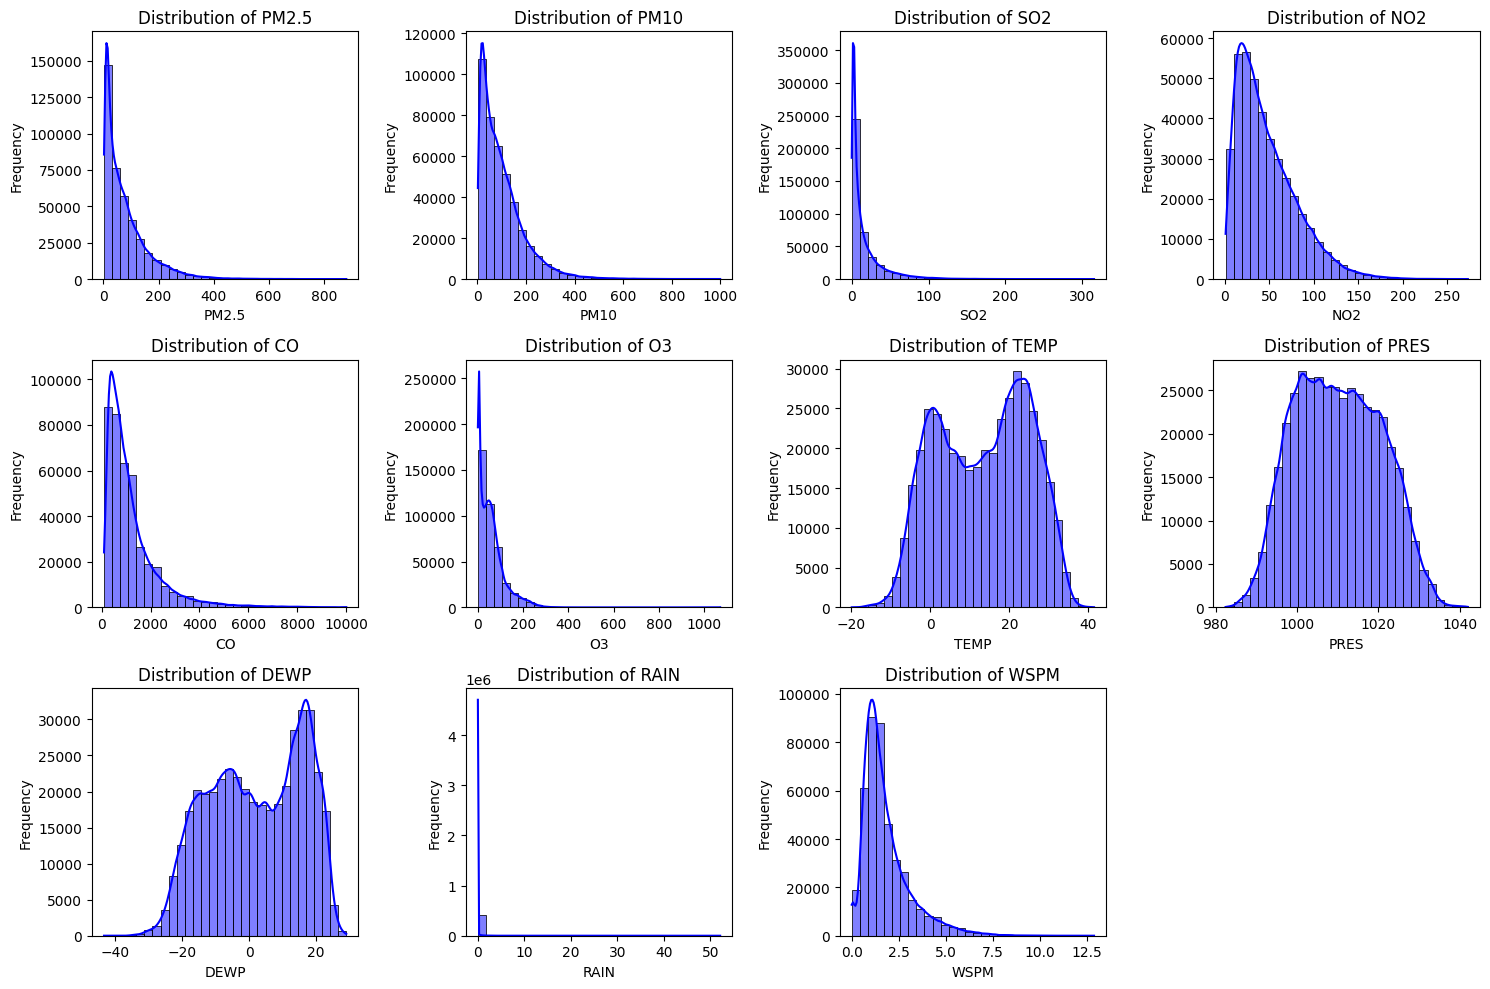

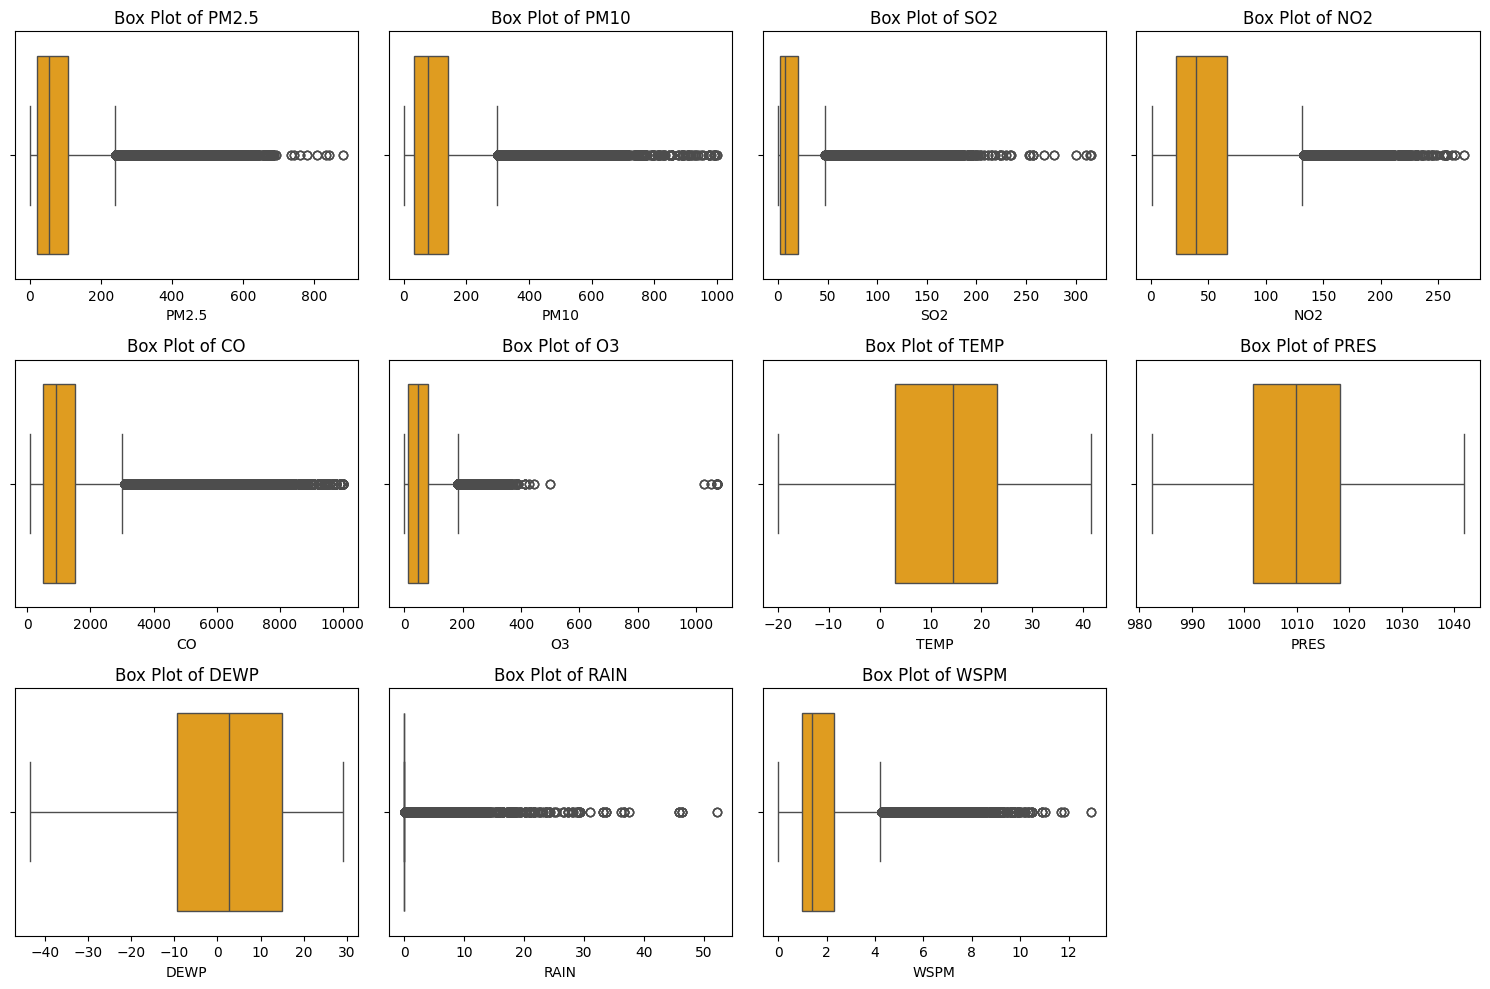

In [ ]:
#import matplotlib.pyplot as plt
#import seaborn as sns

numerical_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[col], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


In [ ]:
skewness_before = df_original[numerical_columns].skew()
print("Skewness before transformations:")
print(skewness_before)

Skewness before transformations:
PM2.5     2.007003
PM10      1.960005
SO2       2.893116
NO2       1.148790
CO        2.646221
O3        2.067812
TEMP     -0.114352
PRES      0.104664
DEWP     -0.173150
RAIN     27.648297
WSPM      1.722944
dtype: float64


### **Task 2.2: Data Preprocessing**

In [ ]:
numerical_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)

categorical_columns = ['station', 'wd']
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
missing_values = missing_values_table(df)
missing_values.style.background_gradient(cmap='Oranges')

           0         1
No         0  0.000000
year       0  0.000000
month      0  0.000000
day        0  0.000000
hour       0  0.000000
PM2.5      0  0.000000
PM10       0  0.000000
SO2        0  0.000000
NO2        0  0.000000
CO         0  0.000000
O3         0  0.000000
TEMP     432  0.102669
PRES     429  0.101956
DEWP     438  0.104095
RAIN     438  0.104095
wd         0  0.000000
WSPM     360  0.085558
station    0  0.000000


,Missing Values,% of Total Values
DEWP,438,0.104095
RAIN,438,0.104095
TEMP,432,0.102669
PRES,429,0.101956
WSPM,360,0.085558
No,0,0.000000
year,0,0.000000
month,0,0.000000
hour,0,0.000000
day,0,0.000000


In [ ]:
df.duplicated().sum()
df = df.drop_duplicates()

In [ ]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']].astype(str).agg(
    lambda x: '-'.join(x.str.zfill(2)), axis=1), format='%Y-%m-%d-%H')

print(df[['date']].head())

                 date
0 2013-03-01 00:00:00
1 2013-03-01 01:00:00
2 2013-03-01 02:00:00
3 2013-03-01 03:00:00
4 2013-03-01 04:00:00


In [ ]:
print(df.head())

   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    5.0  14.0  4.0  12.0  200.0  85.0  -0.5   
1   2  2013      3    1     1    8.0  12.0  6.0  14.0  200.0  84.0  -0.7   
2   3  2013      3    1     2    3.0   6.0  5.0  14.0  200.0  83.0  -1.2   
3   4  2013      3    1     3    5.0   5.0  5.0  14.0  200.0  84.0  -1.4   
4   5  2013      3    1     4    5.0   5.0  6.0  21.0  200.0  77.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM       station                date  
0  1024.5 -21.4   0.0  NNW   5.7  Nongzhanguan 2013-03-01 00:00:00  
1  1025.1 -22.1   0.0   NW   3.9  Nongzhanguan 2013-03-01 01:00:00  
2  1025.3 -24.6   0.0  NNW   5.3  Nongzhanguan 2013-03-01 02:00:00  
3  1026.2 -25.5   0.0    N   4.9  Nongzhanguan 2013-03-01 03:00:00  
4  1027.1 -24.5   0.0  NNW   3.2  Nongzhanguan 2013-03-01 04:00:00  


In [ ]:
df_encoded = pd.get_dummies(df, columns=['station', 'wd'], drop_first=True)

print(df_encoded.head())

   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO  ...  wd_NNW  \
0   1  2013      3    1     0    5.0  14.0  4.0  12.0  200.0  ...    True   
1   2  2013      3    1     1    8.0  12.0  6.0  14.0  200.0  ...   False   
2   3  2013      3    1     2    3.0   6.0  5.0  14.0  200.0  ...    True   
3   4  2013      3    1     3    5.0   5.0  5.0  14.0  200.0  ...   False   
4   5  2013      3    1     4    5.0   5.0  6.0  21.0  200.0  ...    True   

   wd_NW   wd_S  wd_SE  wd_SSE  wd_SSW  wd_SW   wd_W  wd_WNW  wd_WSW  
0  False  False  False   False   False  False  False   False   False  
1   True  False  False   False   False  False  False   False   False  
2  False  False  False   False   False  False  False   False   False  
3  False  False  False   False   False  False  False   False   False  
4  False  False  False   False   False  False  False   False   False  

[5 rows x 35 columns]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df[~((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
df_cleaned.reset_index(drop=True, inplace=True)

In [ ]:
log_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

df_cleaned[log_columns] = df_cleaned[log_columns].apply(lambda x: np.log1p(x))

skewness_after_log = df_cleaned[log_columns].skew()
print("Skewness after log transformation:")
print(skewness_after_log)

Skewness after log transformation:
PM2.5   -0.271632
PM10    -2.239566
SO2      0.791514
NO2     -1.053526
CO      -1.624397
O3      -1.523597
dtype: float64


Skewness after square root transformation:
PM2.5    0.623754
PM10     0.701239
SO2      0.681645
NO2      0.271985
CO       0.795941
O3       0.683443
dtype: float64


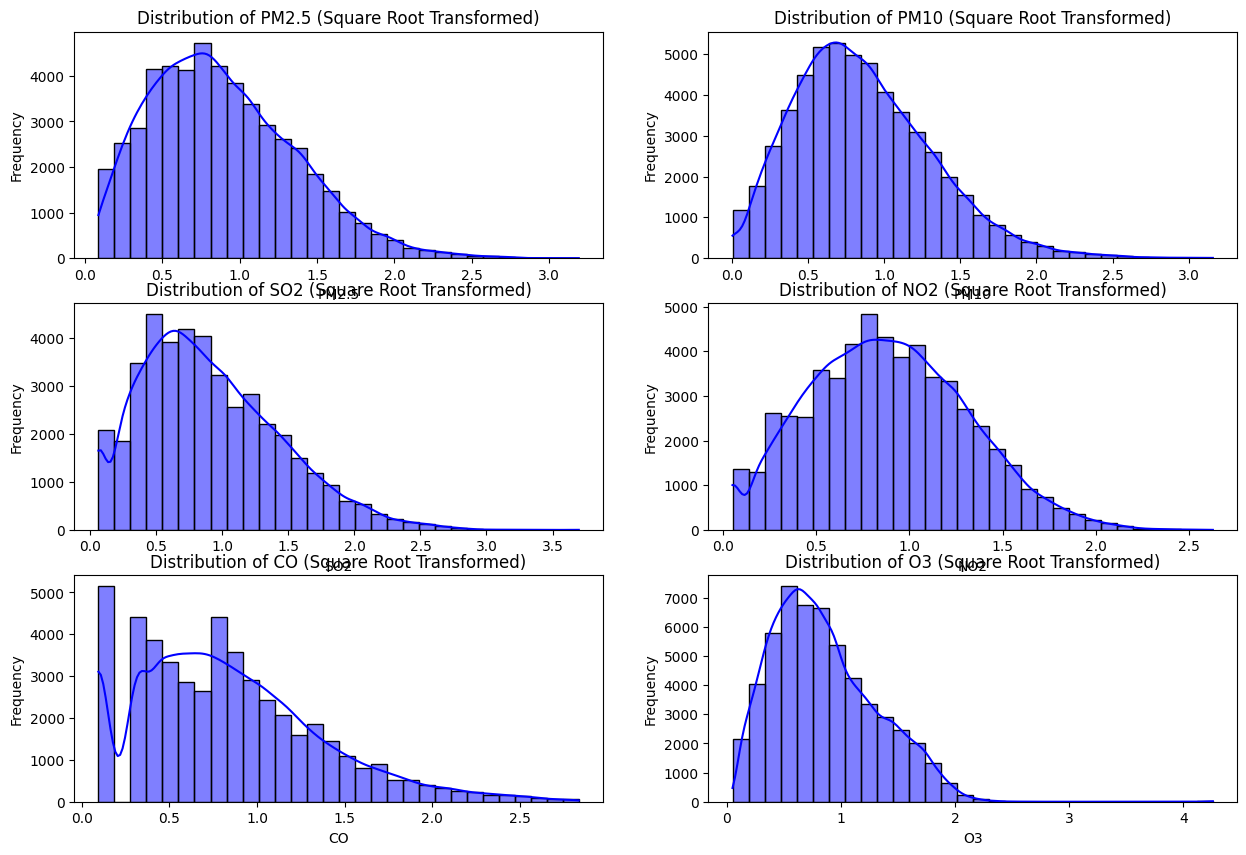

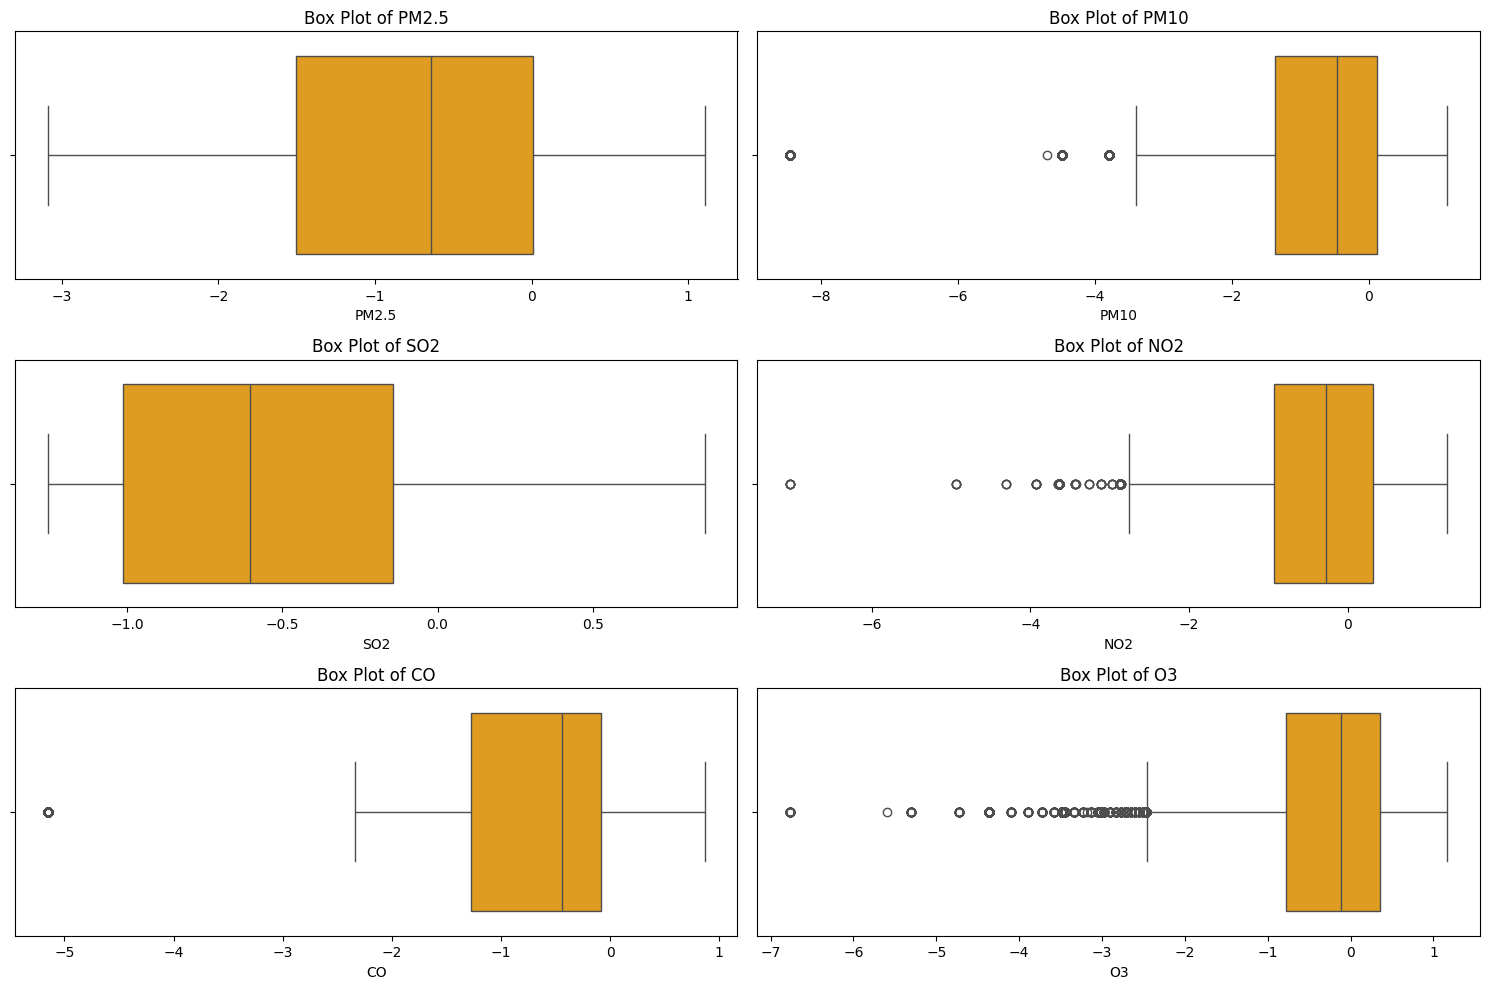

In [ ]:
sqrt_columns = ['PM2.5','PM10', 'SO2','NO2', 'CO', 'O3']
df[sqrt_columns] = df[sqrt_columns].apply(np.sqrt)

skewness_after_sqrt = df[sqrt_columns].skew()
print("Skewness after square root transformation:")
print(skewness_after_sqrt)

plt.figure(figsize=(15, 10))
for i, col in enumerate(sqrt_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.figure(figsize=(15, 10))
for i, col in enumerate(sqrt_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df_cleaned[col], color='orange')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()